### libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats


### read csv to dataframe

In [3]:
df = pd.read_csv (r'tracks_file.csv',sep='\t')

_________________

### Histogram: created_at

In [22]:
df['created_at'] = pd.to_datetime(df['created_at']) # convert string data to datetime object
print(df['created_at'].dt.year.value_counts())

2021    6411
2014    1195
2015    1084
2016     942
2013     853
2020     729
2017     608
2019     574
2018     525
2012     439
2011     247
2010      57
2009       5
2008       2
2007       1
Name: created_at, dtype: int64


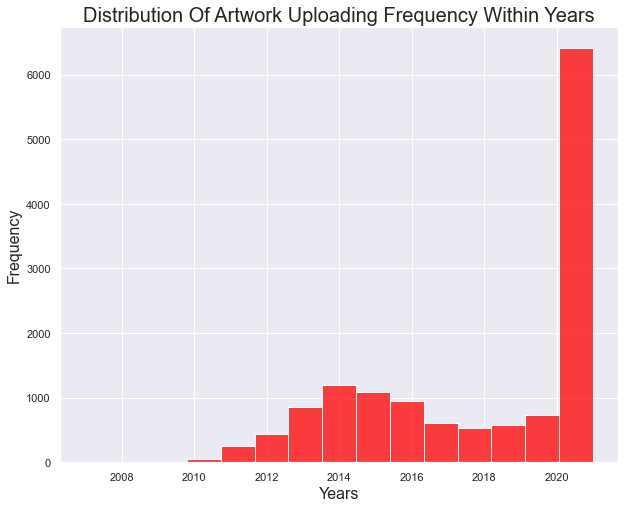

<Figure size 720x576 with 0 Axes>

In [21]:
sns.set(style="darkgrid")
sns.histplot(data=df['created_at'].dt.year, kde=False, color='red', bins=15)
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Distribution Of Artwork Uploading Frequency Within Years', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
plt.clf()

### Nhận xét: 
- Trong khoảng thời gian từ năm 2007 đến hiện tại năm 2021, cột mốc nào ghi nhận SoundCloud trở thành nền tảng phân phối âm nhạc lớn với số ấn phẩm cao kỉ lục?
- **Phân tích**:
    + Sử dụng trường dữ liệu created_at: là một Series ghi nhận thời gian tạo tài khoản của các user, với kiểu định dạng datetime64 
    + Trường created_at không có mất mát dữ liệu
    + Kiểu dữ liệu: datetime64
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Histogram để trực quan hoá vì thuận tiện cho việc thống kê phân phối tần suất của các mốc thời gian
    + Phân phối lệch phải
    + Tần suất: cao nhất (năm 2021/ 6411 lần), thấp nhất (năm 2007/ 1 lần)
    + Trước khi trực quan hoá, dự đoán câu trả lời là năm 2021 vì theo ước tính thời gian càng về sau thì số lượng ấn phẩm sẽ càng nhiều do mức độ phổ biến của SoundCloud phát triển luỹ tiến. Dựa theo biểu đồ trực quan thì suy đoán này là đúng, năm 2021 ghi nhận số lượng ấn phẩm được phát hành cao kỉ lục, gấp 6 lần năm trước (năm 2020)

### Scatter: duration Vs. playback_count

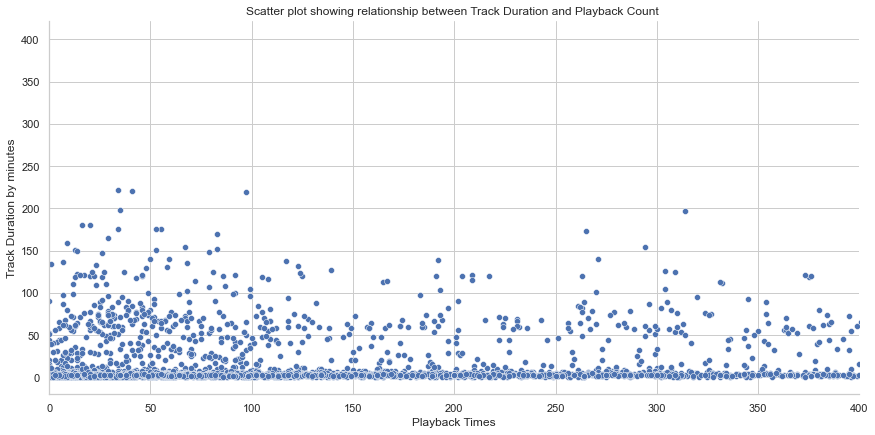

<Figure size 720x576 with 0 Axes>

In [32]:
# fig = plt.figure()
sns.set(style='whitegrid')
ax = sns.relplot(x=df['playback_count'], y=df['duration'] / 1000/ 60, kind='scatter',
            height=6, aspect=2)
ax.set(xlim=(0, 400)) # adjust this line or comment this line

plt.xlabel('Playback Times')
plt.ylabel('Track Duration by minutes')
plt.title('Scatter plot showing relationship between Track Duration and Playback Count ')
plt.ticklabel_format(style='plain', axis='y')
# fig.subplots_adjust(right=2.000,bottom=-1.000)
plt.show()
plt.clf()

### Nhận xét: 
- Mối quan hệ giữa 2 trường duration và playback_count của một track là đồng biến, nghịch biến hay không có tương quan?
- **Phân tích**:
    + Sử dụng trường dữ liệu duration (thời gian của một bài hát, đơn vị giây) và playbacks_count (số lần phát lặp lại của bài hát)
    + Trường duration và playbacks_count đều không có mất mát dữ liệu
    + Kiểu dữ liệu: duration (int64) và playbacks_count (float64)
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Scatterplot để trực quan hoá vì nó phù hợp với nhu cầu thể hiện rõ ràng mối quan hệ của hai trường duration và playbacks_count
    + Biểu đồ phân tán rời rạc, không theo xu hướng nào: hai trường không có mối tương quan
    + Trước khi trực quan hoá, dự đoán câu trả lời là nếu duration càng ngắn thì số lượt playback càng cao (vì thời gian ngắn, user sẽ phát nghe lại nhiều lần)
    + Sau khi trực quan hoá, ta thấy rằng: số lượt playback không phụ thuộc vào duration của một bài hát, duration có thể dài nhưng số lượt playback có thể là nhiều hoặc ít, không theo quy luật nào cả, phụ thuộc vào sở thích gu âm nhạc của user.

### Distplot: Duration

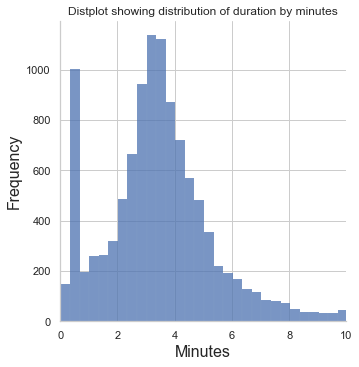

<Figure size 720x576 with 0 Axes>

In [36]:
ax = sns.displot(x=df['duration'] / 1000 / 60)
ax.set(xlim=(0, 10)) # adjust this value
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Minutes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distplot showing distribution of duration by minutes')
plt.show()
plt.clf()


### jointplot: Like and repost of a track

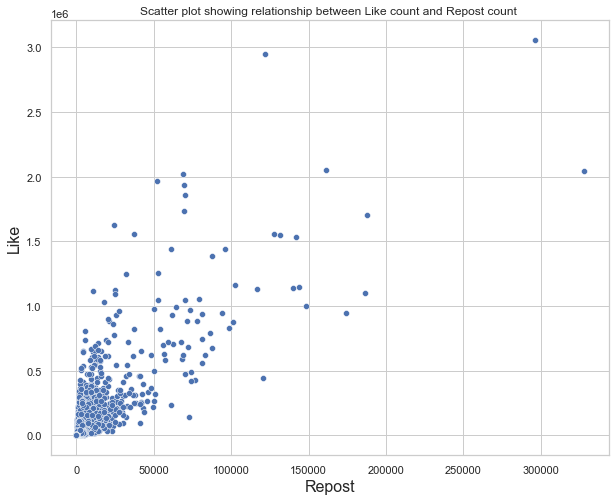

<Figure size 720x576 with 0 Axes>

In [37]:
sns.set(style='whitegrid')
ax = sns.scatterplot(x=df['reposts_count'], y=df['likes_count']) 

plt.xlabel('Repost', fontsize=16)
plt.ylabel('Like', fontsize=16)
plt.title('Scatter plot showing relationship between Like count and Repost count ')
plt.show()
plt.clf()


### Boxplot: reposts_count

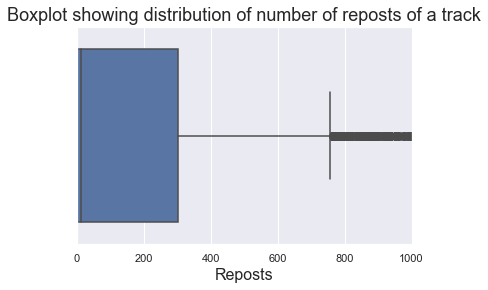

<Figure size 432x288 with 0 Axes>

In [18]:
ax = sns.boxplot(x=df['reposts_count'])
ax.set(xlim=(0, 1000)) # adjust this value
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Reposts', fontsize=16)
plt.title('Boxplot showing distribution of number of reposts of a track', fontsize=18)
plt.show()
plt.clf()

### Correlation matrix: comment, duration, like, repost, download, playback

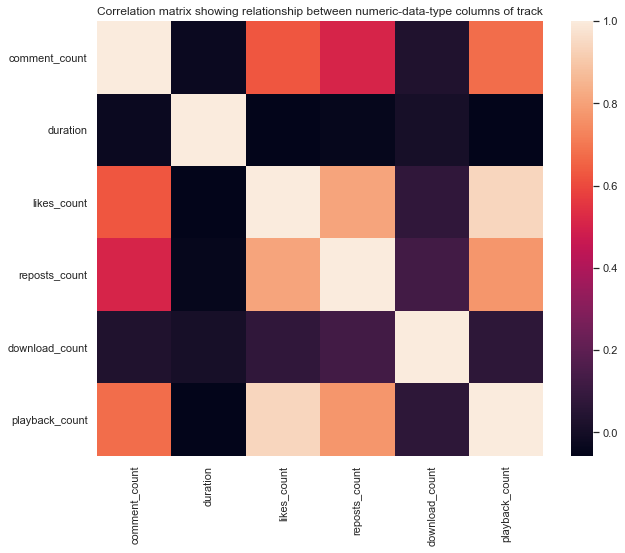

In [39]:
df1 = df[['comment_count','duration','likes_count','reposts_count','download_count','playback_count']]
sns.heatmap(df1.corr())
plt.title('Correlation matrix showing relationship between numeric-data-type columns of track');

### Jointplot: duration vs. likes_count

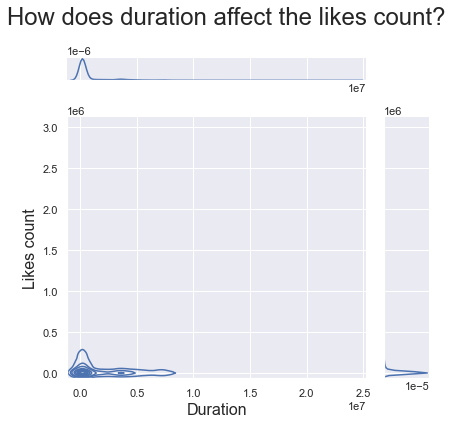

In [40]:
# Plot the jointplot
sns.set_style('darkgrid');
p = sns.jointplot(x='duration',y='likes_count',data=df,kind='kde')

# JointGrid has a convenience function
p.set_axis_labels('Duration', 'Likes count', fontsize=16)
p.ax_marg_x.set_xlim(0, 10000000)
p.ax_marg_y.set_ylim(0, 1000000)
# Set title for plot
p.fig.suptitle( "How does duration affect the likes count?" , size = 24 )
  
# Display figure
plt.tight_layout()

- **Câu hỏi**: Thời luợng của 1 track có ảnh hưởng như thế nào đến số lượt thích của track đó

- **Chuẩn bị dữ liệu**:

    - Các trường dữ liệu cần thiết:
    
        - duration: thời lượng của 1 track
        
        - likes_count: số lượt thích của 1 track
        
    - Kiểu dữ liệu của cả 2 trường là int64
    - Trường `duration` không có dữ liệu mất mát. Tuy nhiên, trường `likes_count` có 300 giá trị là null
    - Không có sự bất thường về kiểu dữ liệu
        
- **Biểu đồ**: Sử dụng Jointplot để trực quan hóa sự ảnh hưởng của thời lượng đến số lượt thích của 1 track. Theo mặc định, Jointplot sẽ tạo ra 1 biểu đồ phân tán(scatter plot) và 2 biểu đồ biên. Tuy nhiên, ta có thể đặt tham số `kind` thành `scatter`, `kde`, `hex`,`hist`,... Trong biểu đồ này, ta sẽ gán `kde` cho tham số `kind`. Do đó, Jointplot hiển thị đường cong mật độ 2 biến trên biểu đồ chính và đường cong mật độ đơn biến trên các biểu đồ biên. Do các giá trị của trường `likes_count` không đồng đều nhau, nghĩa là, có 1 số track có số lượt thích rất cao, và có phần lớn các track không có lượt thích nào,vì vậy, việc sử dụng đường cong mật độ sẽ làm thuận tiện hơn trong quá trình nhận xét.

- **Dự đoán**: Trong thời đại bùng nổ về thông tin như hiện nay thì người dùng thích nghe/xem các sản phẩm có tính viral (có thời lượng ngắn và nội dung ấn tượng). Vì vậy các track có thời lượng càng ngắn thì có khả năng sẽ có lượt thích càng cao 

- **Kết quả**: 
    - Các track thời lượng quá ngắn hoặc quá cao sẽ ít có khả năng được yêu thích các track thời lượng ~100.000s - ~5.000.000s
    - Các biểu đồ biên cũng cho ta các thông tin hữu ích. Phần lớn các track có thời lượng nằm trong khoảng ~10.000s - ~500.000s. Và phần lớn các track trên SoundCloud không có lượt thích nào

### KDEplot: Distribution of music genres year by year

In [ ]:
df['genre'].value_counts()

Trên đây là tần xuất xuất hiện của các giá trị trong cột `genre`. Người dùng được phép tự do đặt tên thể loại cho 1 bài hát, điều này dẫn đến sự không đồng nhất của trường dữ liệu `genre`. Vì vậy ta chọn 5 giá trị xuất hiện nhiều nhất của trường `genre` để trực quan hóa

In [ ]:
subsetDataFrame = df[df['genre'].isin(['Pop','Country','Hip-hop & Rap','Dance & EDM','Electronic'])]
subsetDataFrame['created_at'] = pd.to_datetime(subsetDataFrame['created_at']) # convert string data to datetime object
ax = sns.kdeplot(data=subsetDataFrame, x=subsetDataFrame['created_at'].dt.year, hue="genre", multiple="stack")
ax.set_title("Distribution of 5 music genres year by year",size = 20);

- **Câu hỏi**: Sự phân bố của 5 thể loại track phổ biến nhất trên SoundCloud qua từng năm

- **Chuẩn bị dữ liệu**:

    - Các trường dữ liệu cần thiết:
        -genre: thể loại của 1 track
        -created_at: Ngày, giờ track được đăng lên SoundCloud
    - Trường `created_at` không có dữ liệu mất mát. Tuy nhiên trường `genre` có 3455 giá trị là null trong tổng số 13672 mẫu
    - Kiểu dữ liệu của cả 2 trường đều là `object`. Vì vậy khi trực quan hóa, ta sẽ chuyển kiểu dữ liệu của trường `created_at` về datetime64

- **Biểu đồ**: Dựa vào Kdeplot ta có thể thấy được sự phân bố của 5 thể loại track phổ biến nhất trên SoundCloud qua từng năm một cách liên tục

- **Dự đoán**: Vì là thể loại có tần xuất xuất hiện nhiều nhất nên đồ thị ứng với nhạc Pop sẽ nằm trên tất cả các đồ thị còn lại 

- **Kết quả**: 
    - Mặc dù có tần xuất xuất hiện nhiều nhất nhưng thể loại nhạc Pop chỉ xếp thứ 3 về mật độ xuất hiện qua từng năm. Ta có thể lý giải điều này là do nhạc Pop ra đời đầu tiên nên có tần xuất xuất hiện nhiều nhất và ổn định qua từng năm. 
    - Các thể loại âm nhạc có sự phân bố tương đồng nhau và có sự bùng nổ trong 2021